<h1 align=center>Deep Learning para NLP</h1>
<p align=center><img src=https://www.neurotech.com.br/wp-content/uploads/2019/09/Deep-Learning.png width=500> </p>

Neste capítulo, você implementa aprendizado profundo para NLP. As seguintes receitas são cobertas.
* Receita 1. Recuperação de informações usando aprendizado profundo
* Receita 2. Classificação de texto usando CNN, RNN, LSTM
* Receita 3. Prevendo a próxima palavra/sequência de palavras usando LSTM para e-mail
* Receita 4. Recomendação de pergunta Stack Overflow

## Introdução ao Deep Learning Deep
O aprendizado é um subcampo do aprendizado de máquina inspirado nas funções cerebrais. Assim como os neurônios estão interconectados no cérebro, as redes neurais funcionam da mesma maneira. Cada neurônio recebe entrada, faz alguma manipulação dentro do neurônio e produz uma saída mais próxima da saída esperada (no caso de dados rotulados).

O que acontece dentro do neurônio é o que nos interessa para obter os resultados mais precisos. Ele dá peso a cada entrada e gera uma função para acumular todos esses pesos e passá-los para a próxima camada, que é eventualmente a camada de saída. A rede tem três componentes.
* Camada de entrada
* Camada(s) oculta(s)
* Camada de saída
<p><img src= https://orbograph.com/wp-content/uploads/2019/01/DeepLearn.png></p>

As funções podem ser de tipos diferentes com base no problema ou nos dados. Estas também são chamadas de *funções de ativação*. A seguir descreve os tipos.
* Funções de ativação linear: Um neurônio linear recebe uma combinação linear da entrada ponderada e a saída pode assumir qualquer valor entre infinito negativo a infinito.
* Função de ativação não linear: São as mais utilizadas, e fazem com que a saída fique restrita em alguma faixa.
    * A função de ativação sigmoid ou logit reduz a saída entre 0 e 1 aplicando uma função log, facilitando os problemas de classificação.
    * A função softmax é semelhante à sigmoid, mas calcula as probabilidades do evento em n classes diferentes, o que ajuda a determinar o alvo em problemas de classificação multiclasse.
    * A função tanh é –1 para 1; caso contrário, é o mesmo que sigmóide.
    * A função de ativação da unidade linear retificada converte qualquer coisa que seja menor que zero em zero.

Assim, o intervalo torna-se 0 ao infinito. Ainda não discutimos como o treinamento é realizado em redes neurais. Vamos fazer isso usando a rede neural convolucional.

## Redes Neurais Convolucionais
Uma rede neural convolucional (CNN) é semelhante a uma rede neural comum, mas tem várias camadas ocultas e um filtro chamado *camada de convolução*. A CNN identifica com sucesso rostos, objetos e sinais de trânsito e também é usada em carros autônomos.
## Dados
Algoritmos trabalham basicamente com dados numéricos. Imagens e dados de texto são dados não estruturados e precisam ser convertidos em valores numéricos antes mesmo de começarmos qualquer coisa.
 * *Imagem*: o computador obtém uma imagem como uma matriz de valores de pixel. Dependendo da resolução e tamanho da imagem, ele vê uma matriz de números X * Y * Z. Por exemplo, há uma imagem colorida e seu tamanho é 480 × 480 pixels. A representação da matriz é 480×480×3, onde 3 é o valor RGB da cor. Cada um desses números varia de 0 a 255, que descreve a intensidade/densidade do pixel naquele ponto. O conceito é que, se dado o computador e essa matriz de números, ele gera a probabilidade da imagem ser de uma determinada classe no caso de um problema de classificação.
  * *Texto*: Já discutimos como criar features a partir de texto. Você pode usar qualquer uma dessas técnicas para converter texto em recursos. RNN e LSTM são mais adequados para soluções relacionadas a texto que discutiremos nas próximas seções.
 <p><img src=https://miro.medium.com/max/1400/1*vkQ0hXDaQv57sALXAJquxA.jpeg></p>

## Arquitetura
A CNN é um caso especial de rede neural com uma camada de entrada, uma camada de saída e várias camadas ocultas. As camadas ocultas possuem quatro procedimentos diferentes para completar a rede. Cada um é explicado em detalhes.
<p><img src=https://miro.medium.com/max/800/1*oeLOgg1QuoiA5CwFHmXmrg.png></p>

A camada de convolução é o coração de uma rede neural convolucional, que faz a maioria das operações computacionais. O nome vem do operador de “convolução” que extrai recursos da imagem de entrada. Eles também são chamados de filtros (uma matriz 3*3 laranja). A matriz formada deslizando o filtro sobre a imagem inteira e calculando o produto escalar entre essas duas matrizes é chamada de *feature* convoluída, mapa de ativação ou mapa de *features*. Por exemplo, suponha que diferentes tipos de recursos sejam calculados nos dados da tabela, como “idade” a partir de “data de nascimento”. Bordas retas, cores simples e curvas são algumas das características que o filtro pode extrair de uma imagem.

Durante o treinamento da CNN, ela aprende os números ou valores presentes dentro do filtro e os utiliza nos dados de teste. Quanto maior o número de características, mais as características da imagem são extraídas e reconhecem padrões em imagens não vistas.

### Não linearidade (ReLU)
Uma **unidade linear retificada (ReLU)** é uma função não linear usada após uma camada de convolução na arquitetura CNN. Substitui todos os valores negativos na matriz por zero. O objetivo do ReLU é introduzir não linearidade na CNN para um melhor desempenho.

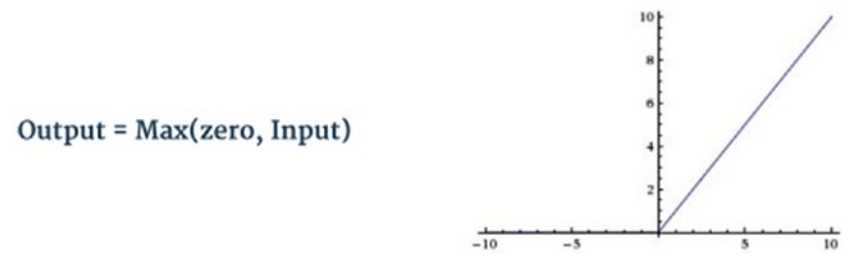

In [1]:
import pandas as pd
from IPython.display import Image
Image('images/ReLU.PNG')

### Pooling
O agrupamento (pooling) ou subamostragem diminui a dimensionalidade do recurso sem perder informações importantes. Isso é feito para reduzir o grande número de entradas para uma camada totalmente conectada e a computação necessária para processar o modelo. Também reduz o overfitting do modelo. Ele usa uma janela 2×2, desliza sobre a imagem e assume o valor máximo em cada região, conforme a figura. É assim que reduz a dimensionalidade.

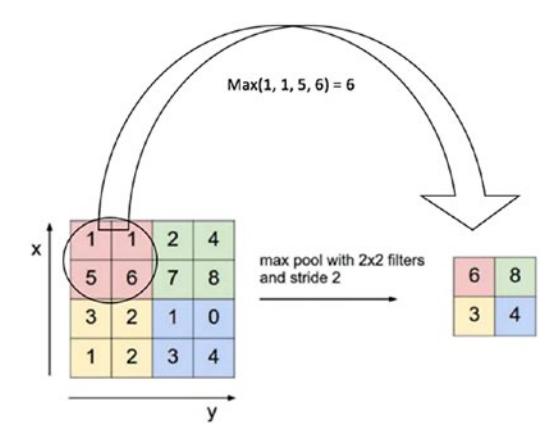

In [2]:
Image('images/pooling.png')

### Flatten, Fully Connected, and Softmax Layers
A última camada é uma camada densa que precisa de vetores de recursos como entrada. Mas a saída da camada de agrupamento não é um vetor de recurso 1D. Esse processo de converter a saída da convolução em um vetor de recursos é chamado de *flattening* (nivelamento). A camada totalmente conectada recebe uma entrada da camada achatada e fornece um vetor n-dimensional onde n é o número de classes. A função da camada totalmente conectada é usar esses recursos para classificar a imagem de entrada em várias classes com base na função de perda no conjunto de dados de treinamento. A função softmax é usada no final para converter esses vetores n-dimensionais em uma probabilidade para cada classe, que eventualmente classifica a imagem em uma classe específica.

### Backpropagation: treinando a rede neural
Em redes neurais normais, você faz a propagação direta para obter a saída e verifica se essa saída está correta e calcula o erro. Na propagação regressiva, você retrocede em sua rede para encontrar as derivadas parciais do erro em relação a cada peso.

Vamos ver como exatamente isso funciona.

A imagem de entrada é alimentada na rede. Ele completa a propagação direta, que é convolução, ReLU e operações de agrupamento com propagação direta na camada totalmente conectada e gera probabilidades de saída para cada classe. De acordo com a regra de feedforward, os pesos são atribuídos aleatoriamente e completam a primeira iteração de treinamento e probabilidades aleatórias de saída. Após o término da primeira etapa, a rede calcula o erro na camada de saída usando

$$
Total Error = \sum \frac{1}{2}(target probability - output probability)^{2}
$$

Agora, sua retropropagação começa a calcular os gradientes do erro em relação a todos os pesos na rede e usa a descida do gradiente para atualizar todos os valores e pesos do filtro, o que acaba minimizando o erro de saída. Parâmetros como o número de filtros, tamanhos de filtro e a arquitetura de rede são finalizados durante a construção de sua rede. A matriz de filtro e os pesos de conexão são atualizados para cada execução. Todo o processo é repetido para todo o conjunto de treinamento até que o erro seja minimizado.

### Redes Neurais Recorrentes
As CNNs são usadas para problemas de visão computacional, mas falham em resolver modelos de sequência. Modelos de sequência são aqueles em que até mesmo uma sequência da entidade também importa. Por exemplo, no texto, a ordem das palavras é importante para criar frases significativas. É aqui que as RNNs entram em cena e são úteis com dados sequenciais porque cada neurônio pode usar sua memória para lembrar informações sobre a etapa anterior.

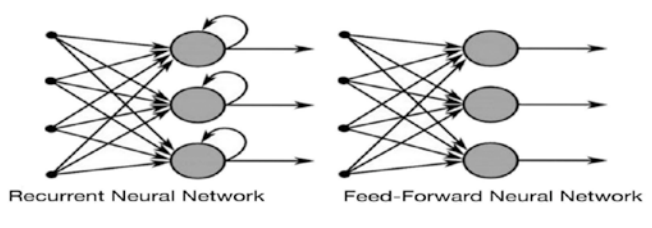

In [3]:
Image('images/RNN.png')

É bastante complexo entender exatamente como o RNN está funcionando. Se você vir a figura acima, a rede neural recorrente pega a saída da camada oculta e a envia de volta para a mesma camada antes de fornecer a previsão.
###  Treinamento RNN: Backpropagation Through Time (BPTT)
Você sabe como o feedforward e o backpropagation funcionam na CNN, então vamos ver como o treinamento é feito na RNN.

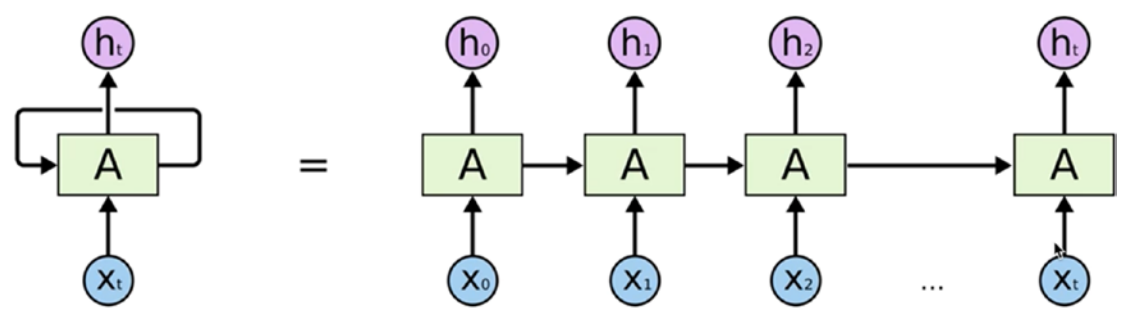

In [4]:
Image('images/RNN_back.PNG')

Se discutirmos apenas a camada oculta, não estamos apenas recebendo entrada da camada oculta, mas também podemos adicionar outra entrada à mesma camada oculta. Agora a retropropagação acontece como qualquer outro treinamento anterior que você já viu; agora, depende do tempo. Aqui, o erro é retropropagado do último registro de data e hora para o primeiro, desenrolando as camadas ocultas. Isso permite calcular o erro para cada timestamp e atualizar os pesos. Redes recorrentes com conexões recorrentes entre unidades ocultas leem uma sequência inteira e então produzem a saída necessária. Quando os valores de gradiente são muito pequenos e o modelo leva muito tempo para aprender, isso é chamado de *gradientes de fuga*. O LSTM resolve esse problema.
### Long Short-Term Memory (LSTM)
LSTMs são como RNNs, mas com uma melhor equação e retropropagação, o que os torna um melhor desempenho. Os LSTMs funcionam de maneira semelhante aos RNNs, mas podem aprender coisas com intervalos de tempo muito longos e podem armazenar informações como computadores.

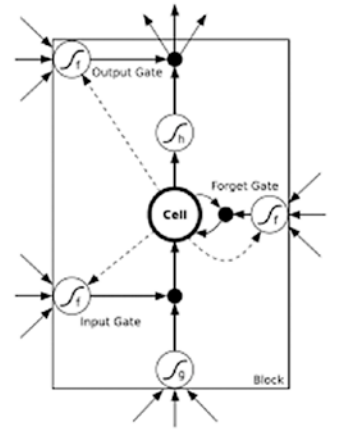

In [5]:
Image('images/gradiente_fuga.PNG')

O algoritmo aprende a importância da palavra ou caractere por meio da metodologia de pesagem e decide se armazena ou não. Para isso, utiliza estruturas reguladas chamadas *gates* que podem retirar ou agregar informações à célula. Essas células possuem uma camada sigmóide que decide quanta informação deve ser passada. Ele tem três camadas - entrada, esquecimento e saída - para realizar esse processo. Uma discussão aprofundada do trabalho da CNN e da RNN está além do escopo deste livro. Há referências no final do livro se você estiver interessado em aprender mais.
## Receita 6-1. Recuperando informações
A recuperação de informações é uma das aplicações mais usadas da NLP e é bastante complicada. O significado das palavras ou frases depende das palavras exatas usadas e do contexto e significado. Duas frases podem ser de palavras completamente diferentes, mas podem transmitir o mesmo significado. Você deve ser capaz de capturar isso. Um sistema de recuperação de informações (IR) permite que os usuários pesquisem documentos com eficiência e recuperem informações significativas com base em um texto/consulta de pesquisa.

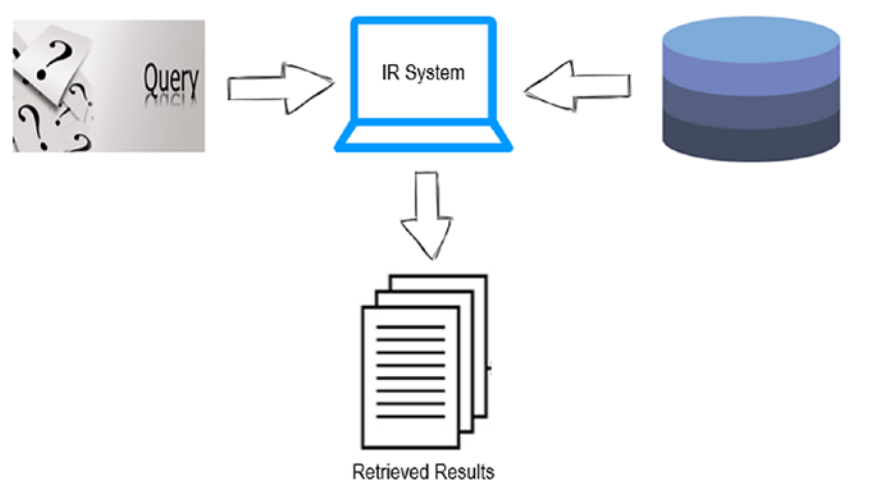

In [6]:
Image('images/retrieve_results.PNG')

### Problema
Recuperação de informações usando embeddings de palavras.
### Solução
Existem várias maneiras de fazer a recuperação de informações. O uso de incorporações de palavras é muito eficaz, pois também leva em consideração o contexto. Discutimos como as incorporações de palavras são construídas no Capítulo 3. A palavra2vec pré-treinada é usada apenas neste caso. Vamos dar um exemplo simples e ver como construir uma recuperação de documento usando entrada de consulta. Digamos que haja quatro documentos no banco de dados, conforme a seguir. (Isso mostra como funciona. Há muitos documentos em um aplicativo do mundo real.)

In [8]:
Doc1 = ["With the Union cabinet approving the amendments to the Motor Vehicles Act, 2016, those caught for drunken driving will have to have really deep pockets, as the fine payable in court has been enhanced to Rs 10,000 for first-time offenders." ]

Doc2 = ["Natural language processing (NLP) is an area of computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data."]

Doc3 = ["He points out that public transport is very good in Mumbai and New Delhi, where there is a good network of suburban and metro rail systems."]

Doc4 = ["But the man behind the wickets at the other end was watching just as keenly. With an affirmative nod from Dhoni, India captain Rohit Sharma promptly asked for a review. Sure enough, the ball would have clipped the top of middle and leg."]

Suponha que existam vários documentos como este. E você deseja recuperar o mais relevante para a consulta “cricket”. Vejamos como construí-lo.

In [9]:
query = "cricket"

### Como funciona
#### Etapa 1-1. Importar as bibliotecas
Aqui estão as bibliotecas.

In [10]:
import gensim
from gensim.models import Word2Vec
import numpy as np
import nltk
import itertools
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
import scipy
from scipy import spatial
from nltk.tokenize.toktok import ToktokTokenizer
import re
tokenizer = ToktokTokenizer()
stopword_list = nltk.corpus.stopwords.words('english')

#### Etapa 1-2. Criar ou importar documentos
Tirando frases da Internet aleatoriamente.

In [11]:
Doc1 = ["With the Union cabinet approving the amendments to the Motor Vehicles Act, 2016, those caught for drunken driving will have to have really deep pockets, as the fine payable in court has been enhanced to Rs 10,000 for first-time offenders." ]

Doc2 = ["Natural language processing (NLP) is an area of computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data."]

Doc3 = ["He points out that public transport is very good in Mumbai and New Delhi, where there is a good network of suburban and metro rail systems."]
Doc4 = ["But the man behind the wickets at the other end was watching just as keenly. With an affirmative nod from Dhoni, India captain Rohit Sharma promptly asked for a review. Sure enough, the ball would have clipped the top of middle and leg."]

# Colocando todas em uma única lista
fin= Doc1+Doc2+Doc3+Doc4

#### Etapa 1-3. Baixar word2vec
Em seguida, vamos usar a incorporação de palavras para resolver esse problema. Baixe o word2vec em https://drive.google.com/file/d/0B7XkCwpI5KDYNlNUTTlSS21pQmM/edit.

In [15]:
# Carregando o modelo

model = gensim.models.KeyedVectors.load_word2vec_format("D:\WILLIAN\OneDrive\Downloads\GoogleNews-vectors-negative300.bin", binary=True)

# Etapa 1-4. Crie um sistema de IR
Agora, construa o sistema de recuperação de informações.

In [24]:
# Préprocessamento
def remove_stopwords(text, is_lower_case=False):
    pattern = r'[^a-zA-z0-9\s]'
    text = re.sub(pattern,'' , ''.join(text))
    tokens = tokenizer.tokenize(text)
    tokens = [token.strip() for token in tokens]
    if is_lower_case:
        filtered_tokens = [token for token in tokens if token not in stopword_list]
    else:
        filtered_tokens = [token for token in tokens if token.lower() not in stopword_list]
    filtered_text = ' '.join(filtered_tokens)
    return filtered_text

# Função para obter o vetor de incorporação para n dimensão, usamos "300"
def get_embedding(word):
    if word in model.key_to_index:
        return model[word]
    else:
        return np.zeros(300)

Para cada documento, obtemos muitos vetores com base no número de palavras presentes. Você precisa calcular o vetor médio para o documento tirando uma média de todos os vetores de palavras.

In [25]:
# Obtendo vetor médio para cada documento
out_dict = {}
for sen in fin:
    average_vector = (np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(remove_stopwords(sen))]), axis=0))
    dict = { sen : (average_vector) }
    out_dict.update(dict)

In [27]:
# Função para calcular a similaridade entre o vetor de consulta e o vetor de documento

def get_sim(query_embedding, average_vector_doc):
    sim = [(1 - scipy.spatial.distance.cosine(query_embedding, average_vector_doc))]
    return sim

# Classifique todos os documentos com base na semelhança para obter documentos relevantes
def Ranked_documents(query):
    query_words = (np.mean(np.array([get_embedding(x) for x in nltk.word_tokenize(query.lower())],dtype=float), axis=0))
    rank = []
    for k,v in out_dict.items():
        rank.append((k, get_sim(query_words, v)))
    rank = sorted(rank,key=lambda t: t[1], reverse=True)
    print('Ranked Documents :')
    return rank

#### Etapa 1-5. Resultados e aplicações
Vejamos o sistema de recuperação de informações que construímos funciona em alguns exemplos.

In [28]:
# Chame a função IR com uma consulta
Ranked_documents("cricket")

Ranked Documents :


[('But the man behind the wickets at the other end was watching just as keenly. With an affirmative nod from Dhoni, India captain Rohit Sharma promptly asked for a review. Sure enough, the ball would have clipped the top of middle and leg.',
  [0.44954328830341783]),
 ('He points out that public transport is very good in Mumbai and New Delhi, where there is a good network of suburban and metro rail systems.',
  [0.23973446930269127]),
 ('With the Union cabinet approving the amendments to the Motor Vehicles Act, 2016, those caught for drunken driving will have to have really deep pockets, as the fine payable in court has been enhanced to Rs 10,000 for first-time offenders.',
  [0.1832371201201335]),
 ('Natural language processing (NLP) is an area of computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.',
  [0.179950

Doc4 (no topo do resultado) é mais relevante para a consulta “cricket”, embora a palavra cricket não seja mencionada nenhuma vez, com uma similaridade de **0,449**. Vamos dar mais um exemplo, como pode ser dirigir.

In [29]:
Ranked_documents("driving")

Ranked Documents :


[('With the Union cabinet approving the amendments to the Motor Vehicles Act, 2016, those caught for drunken driving will have to have really deep pockets, as the fine payable in court has been enhanced to Rs 10,000 for first-time offenders.',
  [0.3594728772380067]),
 ('But the man behind the wickets at the other end was watching just as keenly. With an affirmative nod from Dhoni, India captain Rohit Sharma promptly asked for a review. Sure enough, the ball would have clipped the top of middle and leg.',
  [0.19042557661139026]),
 ('He points out that public transport is very good in Mumbai and New Delhi, where there is a good network of suburban and metro rail systems.',
  [0.1706653724240128]),
 ('Natural language processing (NLP) is an area of computer science and artificial intelligence concerned with the interactions between computers and human (natural) languages, in particular how to program computers to process and analyze large amounts of natural language data.',
  [0.0887230

Mais uma vez, como a direção está conectada ao transporte e à Lei de Veículos Automotores, ela destaca os documentos mais relevantes. Os dois primeiros documentos são relevantes para a consulta. Você pode usar a mesma abordagem e aumentá-la para o maior número possível de documentos. Para maior precisão, você pode construir seus próprios embeddings, como aprendeu no Capítulo 3, para setores específicos, pois o que estamos usando é generalizado.

Esta é a abordagem fundamental que pode ser usada para muitas aplicações como as seguintes.
* Mecanismos de busca
* Recuperação de documentos
* Recuperação de passagens
* Pergunta e resposta

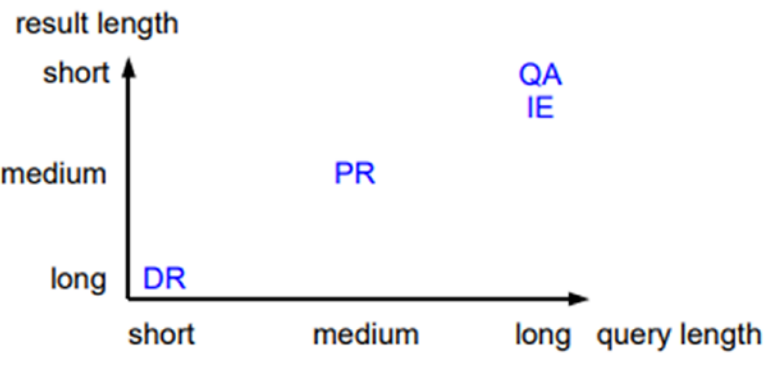

In [30]:
Image('images/abordagem.PNG')

Está provado que os resultados são bons quando as consultas são mais longas e o comprimento resultante é menor. É por isso que você não obtém ótimos resultados nos mecanismos de pesquisa quando a consulta de pesquisa possui um número menor de palavras.

## Receita 6-2. Classificando texto com aprendizado profundo
Esta receita cria um classificador de texto usando abordagens de aprendizado profundo.
### Problema
Você deseja construir um modelo de classificação de texto usando CNN, RNN e LSTM.
### Solução
A abordagem e o pipeline de NLP permanecem os mesmos. A única mudança é que, em vez de usar algoritmos de aprendizado de máquina, estamos construindo modelos usando algoritmos de aprendizado profundo.
### Como funciona
Siga as etapas nesta seção para criar o classificador de e-mail usando as abordagens de aprendizado profundo.
#### Etapa 2-1. Defina a classificação de e-mail do problema de negócios (spam ou ham).
Você precisa classificar spam ou e-mail amador com base no conteúdo do e-mail.
#### Etapa 2-2. Identifique fontes de dados potenciais e colete
Use os mesmos dados da Receita 4-6 do Capítulo 4.

In [32]:
import pandas as pd
# lendo o arquivo
file_content = pd.read_csv('spam.csv', encoding='ISO-8859-1')

# Checando um exemplo de email
file_content['v2'][1]

'Ok lar... Joking wif u oni...'

#### Etapa 2-3. Pré-processar texto
Vamos pré-processar os dados.

In [39]:
#Import library
from nltk.corpus import stopwords
from nltk import *

from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.stem import WordNetLemmatizer
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
# Remove stop words
stop = stopwords.words('english')
file_content['v2'] = file_content['v2'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

# Delete unwanted columns
Email_Data = file_content[['v1', 'v2']]
# Rename column names
Email_Data = Email_Data.rename(columns={"v1":"Target", "v2":"Email"})
Email_Data.head()

,Target,Email
0,ham,"Go jurong point, crazy.. Available bugis n gre..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry 2 wkly comp win FA Cup final tkts 2...
3,ham,U dun say early hor... U c already say...
4,ham,"Nah I think goes usf, lives around though"


In [40]:
# Exclua as pontuações, converta o texto em minúsculas e exclua o espaço duplo
Email_Data['Email'] = Email_Data['Email'].apply(lambda x:re.sub('[!@#$:).;,?&]', '', x.lower()))
Email_Data['Email'] = Email_Data['Email'].apply(lambda x: re.sub(' ', ' ', x))
Email_Data['Email'].head(5)

0    go jurong point crazy available bugis n great ...
1                              ok lar joking wif u oni
2    free entry 2 wkly comp win fa cup final tkts 2...
3                  u dun say early hor u c already say
4             nah i think goes usf lives around though
Name: Email, dtype: object

In [41]:
#Separando texto(entrada) e classes de destino
list_sentences_rawdata = Email_Data["Email"].fillna("_na_").values
list_classes = ["Target"]
target = Email_Data[list_classes].values
To_Process=Email_Data[['Email', 'Target']]

#### Etapa 2-4. Preparar os dados para a construção do modelo
Em seguida, prepare os dados.

In [42]:
#Train and test split com a razão de 80:20
train, test = train_test_split(To_Process, test_size=0.2)

In [46]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.utils import pad_sequences
# Defina os comprimentos da sequência, número máximo de palavras e dimensões de incorporação
# Comprimento da sequência de cada frase. Se mais, truncar. Se for menor, preencha com zeros
MAX_SEQUENCE_LENGTH = 300 #user_transform
# As 20.000 palavras mais frequentes
MAX_NB_WORDS = 20000
#Obtenha as palavras que ocorrem com frequência
tokenizer = Tokenizer(num_words=MAX_NB_WORDS)
tokenizer.fit_on_texts(train.Email)
train_sequences = tokenizer.texts_to_sequences(train.Email)
test_sequences = tokenizer.texts_to_sequences(test.Email)
# dictionary containing words and their index
word_index = tokenizer.word_index
# print(tokenizer.word_index)
# total words in the corpus
print('Found %s unique tokens.' % len(word_index))
# get only the top frequent words on train
train_data = pad_sequences(train_sequences, maxlen=MAX_SEQUENCE_LENGTH)
# get only the top frequent words on test
test_data = pad_sequences(test_sequences, maxlen=MAX_SEQUENCE_LENGTH)
print(train_data.shape)
print(test_data.shape)

Found 8471 unique tokens.
(4457, 300)
(1115, 300)


In [47]:
train_labels = train['Target']
test_labels = test['Target']

# import a biblioteca
from sklearn.preprocessing import LabelEncoder

# Converta a matriz de caracteres em matriz numérica. Atribui níveis a rótulos exclusivos.
le = LabelEncoder()
le.fit(train_labels)
train_labels = le.transform(train_labels)
test_labels = le.transform(test_labels)
print(le.classes_)
print(np.unique(train_labels, return_counts=True))
print(np.unique(test_labels, return_counts=True))

['ham' 'spam']
(array([0, 1]), array([3857,  600], dtype=int64))
(array([0, 1]), array([968, 147], dtype=int64))


In [49]:
from tensorflow.keras.utils import to_categorical
# alterando os tipos de dados
labels_train = to_categorical(np.asarray(train_labels))
labels_test = to_categorical(np.asarray(test_labels))
print('Shape of data tensor:', train_data.shape)
print('Shape of label tensor:', labels_train.shape)
print('Shape of label tensor:', labels_test.shape)

Shape of data tensor: (4457, 300)
Shape of label tensor: (4457, 2)
Shape of label tensor: (1115, 2)


In [50]:
EMBEDDING_DIM = 100
print(MAX_SEQUENCE_LENGTH)

300


#### Etapa 2-5. Construção e previsão de modelos
Estamos construindo os modelos usando diferentes abordagens de aprendizado profundo – como CNN, RNN, LSTM e LSTM bidirecional – e comparando o desempenho de cada modelo usando diferentes métricas de precisão. Primeiro, vamos definir o modelo CNN. Aqui definimos uma única camada oculta com 128 unidades de memória. A rede usa um dropout com uma probabilidade de 0,5. A camada de saída é uma camada densa que usa a função de ativação softmax para produzir uma previsão de probabilidade.

In [54]:
# Import Libraries
import sys, os, re, csv, codecs, numpy as np, pandas as pd
from keras.preprocessing.text import Tokenizer
from keras.utils import to_categorical
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation
from keras.layers import Bidirectional, GlobalMaxPool1D, Conv1D, SimpleRNN
from keras.models import Model
from keras.models import Sequential
from keras import initializers, regularizers, constraints, optimizers, layers
from keras.layers import Dense, Input, Flatten, Dropout, BatchNormalization
from keras.layers import Conv1D, MaxPooling1D, Embedding
from keras.models import Sequential

print('Training CNN 1D model.')
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Dropout(0.5))
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Conv1D(128, 5, activation="relu"))
model.add(MaxPooling1D(5))
model.add(Dropout(0.5))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(128, activation="relu"))
model.add(Dense(2, activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer="rmsprop", metrics=['acc'])

# Agora estamos ajustando nosso modelo aos dados. Existem cinco épocas e um tamanho de lote de 64 padrões.
model.fit(train_data, labels_train, batch_size=64, epochs=5, validation_data=(test_data, labels_test))

Training CNN 1D model.
Epoch 1/5
70/70 [==============================] - 8s 91ms/step - loss: 0.4719 - acc: 0.8073 - val_loss: 0.6076 - val_acc: 0.8682
Epoch 2/5
70/70 [==============================] - 7s 96ms/step - loss: 0.2017 - acc: 0.9309 - val_loss: 0.6638 - val_acc: 0.8682
Epoch 3/5
70/70 [==============================] - 6s 92ms/step - loss: 0.1027 - acc: 0.9720 - val_loss: 0.3247 - val_acc: 0.8682
Epoch 4/5
70/70 [==============================] - 6s 92ms/step - loss: 0.0660 - acc: 0.9818 - val_loss: 0.4932 - val_acc: 0.8780
Epoch 5/5
70/70 [==============================] - 7s 98ms/step - loss: 0.0485 - acc: 0.9874 - val_loss: 0.5490 - val_acc: 0.9417


In [55]:
#previsões em dados de teste
predicted=model.predict(test_data)
predicted

35/35 [==============================] - 1s 11ms/step


array([[0.5892909 , 0.4107091 ],
       [0.5878391 , 0.41216087],
       [0.43435603, 0.565644  ],
       ...,
       [0.39619514, 0.6038049 ],
       [0.5883791 , 0.4116209 ],
       [0.58694947, 0.4130506 ]], dtype=float32)

In [56]:
#avaliação do modelo
import sklearn
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, predicted.round()))

precision: [0.93707648 1.        ]
recall: [1.         0.55782313]
fscore: [0.96751624 0.71615721]
support: [968 147]
############################
              precision    recall  f1-score   support

           0       0.94      1.00      0.97       968
           1       1.00      0.56      0.72       147

   micro avg       0.94      0.94      0.94      1115
   macro avg       0.97      0.78      0.84      1115
weighted avg       0.95      0.94      0.93      1115
 samples avg       0.94      0.94      0.94      1115



Agora podemos definir nosso modelo RNN

In [57]:
#import library
from tensorflow.keras.layers import SimpleRNN
#model training
print('Training SIMPLERNN model.')
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(SimpleRNN(2, input_shape=(None,1)))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy',
optimizer="adam",metrics = ['accuracy'])

model.fit(train_data, labels_train, batch_size=16, epochs=5, validation_data=(test_data, labels_test))

Training SIMPLERNN model.
Epoch 1/5
279/279 [==============================] - 16s 54ms/step - loss: 0.4823 - accuracy: 0.9199 - val_loss: 0.3427 - val_accuracy: 0.9857
Epoch 2/5
279/279 [==============================] - 14s 51ms/step - loss: 0.2714 - accuracy: 0.9883 - val_loss: 0.2284 - val_accuracy: 0.9865
Epoch 3/5
279/279 [==============================] - 15s 54ms/step - loss: 0.1784 - accuracy: 0.9953 - val_loss: 0.1612 - val_accuracy: 0.9901
Epoch 4/5
279/279 [==============================] - 15s 55ms/step - loss: 0.1189 - accuracy: 0.9978 - val_loss: 0.1211 - val_accuracy: 0.9865
Epoch 5/5
279/279 [==============================] - 16s 56ms/step - loss: 0.0815 - accuracy: 0.9991 - val_loss: 0.0975 - val_accuracy: 0.9874


In [59]:
# previsão em dados de teste
predicted_Srnn=model.predict(test_data)
predicted_Srnn

35/35 [==============================] - 0s 8ms/step


array([[0.9976261 , 0.00237385],
       [0.9977527 , 0.0022473 ],
       [0.03157524, 0.9684248 ],
       ...,
       [0.03162861, 0.9683714 ],
       [0.99774843, 0.0022515 ],
       [0.95565414, 0.04434588]], dtype=float32)

In [60]:
#Avaliação do modelo
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted_Srnn.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, predicted_Srnn.round()))

precision: [0.98673469 0.99259259]
recall: [0.99896694 0.91156463]
fscore: [0.99281314 0.95035461]
support: [968 147]
############################
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       968
           1       0.99      0.91      0.95       147

   micro avg       0.99      0.99      0.99      1115
   macro avg       0.99      0.96      0.97      1115
weighted avg       0.99      0.99      0.99      1115
 samples avg       0.99      0.99      0.99      1115



E aqui está nosso modelo de memória de longo prazo (LSTM).

In [64]:
#model training
print('Training LSTM model.')
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(LSTM(units=16, activation="relu", return_sequences=True))
model.add(Dropout(0.2))
model.add(BatchNormalization())
model.add(Flatten())
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer="adam",metrics = ['accuracy'])
model.fit(train_data, labels_train, batch_size=16, epochs=5, validation_data=(test_data, labels_test))

Training LSTM model.
Epoch 1/5
279/279 [==============================] - 22s 72ms/step - loss: 0.1505 - accuracy: 0.9477 - val_loss: 0.2051 - val_accuracy: 0.9399
Epoch 2/5
279/279 [==============================] - 19s 66ms/step - loss: 0.0186 - accuracy: 0.9942 - val_loss: 0.0411 - val_accuracy: 0.9910
Epoch 3/5
279/279 [==============================] - 18s 66ms/step - loss: 0.0034 - accuracy: 0.9991 - val_loss: 0.0338 - val_accuracy: 0.9919
Epoch 4/5
279/279 [==============================] - 19s 69ms/step - loss: 0.0014 - accuracy: 0.9996 - val_loss: 0.0316 - val_accuracy: 0.9937
Epoch 5/5
279/279 [==============================] - 21s 74ms/step - loss: 0.0011 - accuracy: 0.9996 - val_loss: 0.0402 - val_accuracy: 0.9928


In [65]:
#Predição Text Data
predicted_lstm=model.predict(test_data)
predicted_lstm

35/35 [==============================] - 1s 15ms/step


array([[1.0000000e+00, 1.8094937e-17],
       [1.0000000e+00, 1.1817142e-10],
       [5.2327661e-18, 1.0000000e+00],
       ...,
       [2.0704541e-15, 1.0000000e+00],
       [1.0000000e+00, 4.8835163e-14],
       [9.9780720e-01, 2.1927652e-03]], dtype=float32)

In [66]:
#model evaluation
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted_lstm.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, predicted_lstm.round()))

precision: [0.99281314 0.9929078 ]
recall: [0.99896694 0.95238095]
fscore: [0.99588054 0.97222222]
support: [968 147]
############################
              precision    recall  f1-score   support

           0       0.99      1.00      1.00       968
           1       0.99      0.95      0.97       147

   micro avg       0.99      0.99      0.99      1115
   macro avg       0.99      0.98      0.98      1115
weighted avg       0.99      0.99      0.99      1115
 samples avg       0.99      0.99      0.99      1115



Por fim, vamos discutir o LSTM bidirecional e implementá-lo. O LSTM preserva as informações das entradas usando o estado oculto. Em LSTMs bidirecionais, as entradas são alimentadas de duas maneiras: uma do passado para o futuro e outra retrocedendo do futuro para o passado, ajudando a aprender as representações futuras. Os LSTMs bidirecionais são conhecidos por produzir resultados muito bons porque podem entender melhor o contexto.

In [68]:
#model training
print('Training Bidirectional LSTM model.')
model = Sequential()
model.add(Embedding(MAX_NB_WORDS, EMBEDDING_DIM, input_length=MAX_SEQUENCE_LENGTH))
model.add(Bidirectional(LSTM(16, return_sequences=True, dropout=0.1,recurrent_dropout=0.1)))
model.add(Conv1D(16, kernel_size = 3, padding = "valid",kernel_initializer = "glorot_uniform"))
model.add(GlobalMaxPool1D())
model.add(Dense(50, activation="relu"))
model.add(Dropout(0.1))
model.add(Dense(2,activation='softmax'))
model.compile(loss = 'binary_crossentropy', optimizer="adam",metrics =['accuracy'])
model.fit(train_data, labels_train, batch_size=16, epochs=3, validation_data=(test_data, labels_test))

Training Bidirectional LSTM model.
Epoch 1/3
279/279 [==============================] - 63s 211ms/step - loss: 0.1805 - accuracy: 0.9410 - val_loss: 0.0250 - val_accuracy: 0.9928
Epoch 2/3
279/279 [==============================] - 59s 211ms/step - loss: 0.0181 - accuracy: 0.9957 - val_loss: 0.0240 - val_accuracy: 0.9937
Epoch 3/3
279/279 [==============================] - 62s 221ms/step - loss: 0.0058 - accuracy: 0.9991 - val_loss: 0.0250 - val_accuracy: 0.9910


In [69]:
# prediction on test data
predicted_blstm=model.predict(test_data)
predicted_blstm

35/35 [==============================] - 1s 22ms/step


array([[9.9999928e-01, 6.6595504e-07],
       [1.0000000e+00, 3.3030332e-08],
       [1.2347166e-09, 1.0000000e+00],
       ...,
       [2.1745873e-10, 1.0000000e+00],
       [1.0000000e+00, 4.1675698e-09],
       [9.8436940e-01, 1.5630651e-02]], dtype=float32)

In [70]:
#model evaluation
from sklearn.metrics import precision_recall_fscore_support as score
precision, recall, fscore, support = score(labels_test, predicted_blstm.round())
print('precision: {}'.format(precision))
print('recall: {}'.format(recall))
print('fscore: {}'.format(fscore))
print('support: {}'.format(support))
print("############################")
print(sklearn.metrics.classification_report(labels_test, predicted_blstm.round()))

precision: [0.99178645 0.9858156 ]
recall: [0.99793388 0.94557823]
fscore: [0.99485067 0.96527778]
support: [968 147]
############################
              precision    recall  f1-score   support

           0       0.99      1.00      0.99       968
           1       0.99      0.95      0.97       147

   micro avg       0.99      0.99      0.99      1115
   macro avg       0.99      0.97      0.98      1115
weighted avg       0.99      0.99      0.99      1115
 samples avg       0.99      0.99      0.99      1115



## Receita 6-3. Previsão da Próxima Palavra
O preenchimento automático/mostrar a sequência potencial de palavras economiza muito tempo ao escrever e-mails e deixa os usuários felizes em usá-lo em qualquer produto.
### Problema
Você deseja construir um modelo para prever/sugerir a próxima palavra com base em uma sequência anterior de palavras usando dados de e-mail. Como você vê na imagem abaixo, o idioma está sendo sugerido como a próxima palavra.

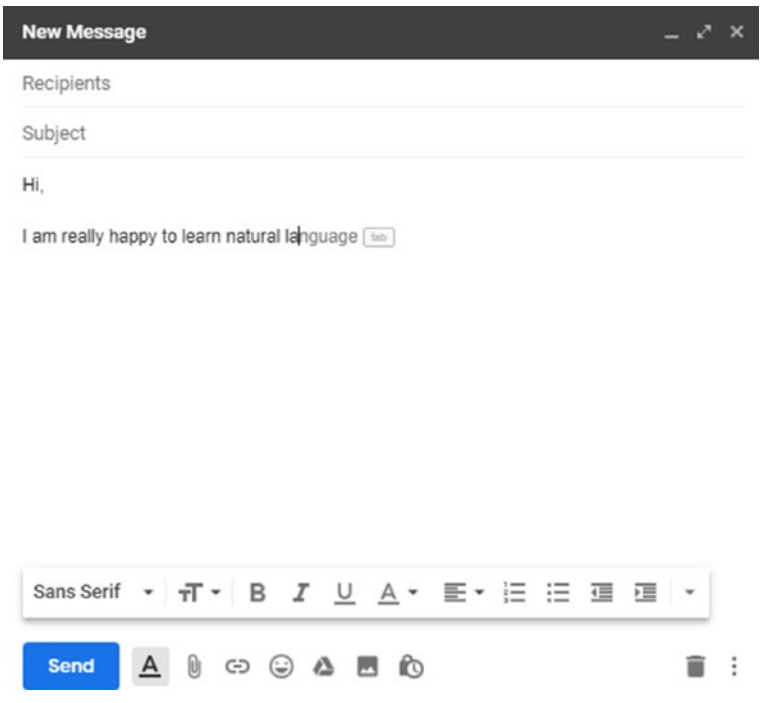

In [71]:
Image('images/autofill.PNG')

### Solução
Esta seção cria um modelo LSTM para aprender sequências de palavras a partir de dados de e-mail. Este modelo prevê a próxima palavra.
### Como funciona
Siga as etapas nesta seção para criar o próximo modelo de previsão de palavras usando a abordagem de aprendizado profundo.
#### ETapa 3-1. Defina o problema do negócio
Preveja a próxima palavra com base na sequência de palavras ou frases.
### ETapa 3-2. Identifique fontes de dados em potencial e colete
Para este problema, vamos usar os mesmos dados de e-mail da Receita 4-6 no Capítulo 4. Isso tem muito menos dados, mas ainda assim, para mostrar o fluxo de trabalho, estamos bem com esses dados. Quanto mais dados, melhor a precisão.

In [72]:
file_content = pd.read_csv('spam.csv', encoding = "ISO-8859-1")
# Just selecting emails and connverting it into list
Email_Data = file_content[[ 'v2']]
list_data = Email_Data.values.tolist()
list_data

[['Go until jurong point, crazy.. Available only in bugis n great world la e buffet... Cine there got amore wat...'],
 ['Ok lar... Joking wif u oni...'],
 ["Free entry in 2 a wkly comp to win FA Cup final tkts 21st May 2005. Text FA to 87121 to receive entry question(std txt rate)T&C's apply 08452810075over18's"],
 ['U dun say so early hor... U c already then say...'],
 ["Nah I don't think he goes to usf, he lives around here though"],
 ["FreeMsg Hey there darling it's been 3 week's now and no word back! I'd like some fun you up for it still? Tb ok! XxX std chgs to send, å£1.50 to rcv"],
 ['Even my brother is not like to speak with me. They treat me like aids patent.'],
 ["As per your request 'Melle Melle (Oru Minnaminunginte Nurungu Vettam)' has been set as your callertune for all Callers. Press *9 to copy your friends Callertune"],
 ['WINNER!! As a valued network customer you have been selected to receivea å£900 prize reward! To claim call 09061701461. Claim code KL341. Valid 12 hour

#### Etapa 3-3. Importe e instale as bibliotecas necessárias
Aqui estão as bibliotecas.

In [73]:
import numpy as np
import random
import pandas as pd
import sys
import os
import time
import codecs
import collections
import numpy
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import LSTM
from keras.callbacks import ModelCheckpoint
from keras.utils import np_utils
from nltk.tokenize import sent_tokenize, word_tokenize
import scipy
from scipy import spatial
from nltk.tokenize.toktok import ToktokTokenizer
import re
tokenizer = ToktokTokenizer()

#### Etapa 3-4. Processe os dados
Em seguida, processe os dados.

In [76]:
#Converting list to string
from collections.abc import Iterable
def flatten(items):
    """
    Yield items from any nested iterable
    """
    for x in items:
        if isinstance(x, Iterable) and not isinstance(x, (str, bytes)):
            for sub_x in flatten(x):
                yield sub_x
        else:
            yield x
TextData=list(flatten(list_data))
TextData = ''.join(TextData)
# Remove unwanted lines and converting into lower case
TextData = TextData.replace('\n','')
TextData = TextData.lower()
pattern = r'[^a-zA-z0-9\s]'
TextData = re.sub(pattern, '', ''.join(TextData))
# Tokenizing
tokens = tokenizer.tokenize(TextData)
tokens = [token.strip() for token in tokens]
# get the distinct words and sort it
word_counts = collections.Counter(tokens)
word_c = len(word_counts)
print(word_c)
distinct_words = [x[0] for x in word_counts.most_common()]
distinct_words_sorted = list(sorted(distinct_words))
# Generate indexing for all words
word_index = {x: i for i, x in enumerate(distinct_words_sorted)}
# decide on sentence length
sentence_length = 25

13345


#### Etapa 3-5. Preparar dados para modelagem
Esta etapa divide o e-mail em uma sequência de palavras com um comprimento fixo de dez palavras. (Você pode escolher qualquer coisa com base no problema de negócios e no poder de computação.) O texto é dividido por sequências de palavras. Ao criar essas sequências, essa janela desliza por todo o documento uma palavra por vez, permitindo que cada palavra aprenda com a anterior.

In [77]:
# prepare o conjunto de dados de entrada para pares de saída codificados como inteiros
# Gera os dados para o modelo
# input = a frase de entrada para o modelo com índice
# output = saída do modelo com índice
InputData = []
OutputData = []
for i in range(0, word_c - sentence_length, 1):
    X = tokens[i:i + sentence_length]
    Y = tokens[i + sentence_length]
    InputData.append([word_index[char] for char in X])
    OutputData.append(word_index[Y])
print (InputData[:1])
print ("\n")
print(OutputData[:1])

[[5086, 12190, 6352, 9096, 3352, 1920, 8507, 5937, 2535, 7886, 5214, 12910, 6541, 4104, 2531, 2997, 11473, 5170, 1595, 12552, 6590, 6316, 12758, 12087, 8496]]


[4292]


In [78]:
# Generate X
X = numpy.reshape(InputData, (len(InputData), sentence_length, 1))
# One hot encode the output variable
Y = np_utils.to_categorical(OutputData)
Y

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

## Etapa 3-6. Construa o modelo
Em seguida, vamos definir o modelo LSTM, uma única camada oculta LSTM com 256 unidades de memória. Este modelo usa dropout 0.2. A camada de saída usa a função de ativação softmax. Aqui usamos o otimizador ADAM.

In [79]:
# define the LSTM model
model = Sequential()
model.add(LSTM(256, input_shape=(X.shape[1], X.shape[2])))
model.add(Dropout(0.2))
model.add(Dense(Y.shape[1], activation="softmax"))
model.compile(loss='categorical_crossentropy', optimizer="adam")
#define the checkpoint
file_name_path="weights-improvement-{epoch:02d}-{loss:.4f}.hdf5"
checkpoint = ModelCheckpoint(file_name_path, monitor="loss", verbose=1, save_best_only=True, mode="min")
callbacks = [checkpoint]

Agora você pode ajustar o modelo aos dados. Aqui usamos cinco épocas e um tamanho de lote de 128 padrões. Para melhores resultados, você pode usar mais épocas como 50 ou 100. E, claro, você pode usá-los em mais dados.

In [80]:
#fit the model
model.fit(X, Y, epochs=5, batch_size=128, callbacks=callbacks)

Epoch 1/5
105/105 [==============================] - ETA: 0s - loss: 7.8795
Epoch 1: loss improved from inf to 7.87949, saving model to weights-improvement-01-7.8795.hdf5
105/105 [==============================] - 14s 112ms/step - loss: 7.8795
Epoch 2/5
105/105 [==============================] - ETA: 0s - loss: 7.1410
Epoch 2: loss improved from 7.87949 to 7.14097, saving model to weights-improvement-02-7.1410.hdf5
105/105 [==============================] - 11s 109ms/step - loss: 7.1410
Epoch 3/5
105/105 [==============================] - ETA: 0s - loss: 7.0725
Epoch 3: loss improved from 7.14097 to 7.07246, saving model to weights-improvement-03-7.0725.hdf5
105/105 [==============================] - 11s 106ms/step - loss: 7.0725
Epoch 4/5
105/105 [==============================] - ETA: 0s - loss: 6.9743
Epoch 4: loss improved from 7.07246 to 6.97427, saving model to weights-improvement-04-6.9743.hdf5
105/105 [==============================] - 11s 109ms/step - loss: 6.9743
Epoch 5/5
10

> **Observação**
> Não dividimos os dados em dados de treinamento e teste. Não estamos interessados no modelo exato. Os modelos de aprendizado profundo exigem muitos dados para treinamento e levam muito tempo para treinar, portanto, estamos usando um ponto de verificação de modelo para capturar todos os pesos do modelo a serem arquivados. Usamos o melhor conjunto de pesos para nossa previsão.

Depois de executar o código, você terá arquivos de ponto de verificação de peso em seu diretório local. Escolha o arquivo de pesos de rede que está salvo em seu diretório de trabalho. Quando executamos este exemplo, obtivemos o seguinte ponto de verificação com a menor perda que alcançamos com cinco épocas.

In [82]:
# load the network weights
file_name = "weights-improvement-05-6.8830.hdf5"
model.load_weights(file_name)
model.compile(loss='categorical_crossentropy', optimizer="adam")

#### Etapa 3-7. Prever a próxima palavra
Gere aleatoriamente uma sequência de palavras e entradas para o modelo e veja o que ele prevê.

In [83]:
# Generating random sequence
start = numpy.random.randint(0, len(InputData))
input_sent = InputData[start]
# Generate index of the next word of the email
X = numpy.reshape(input_sent, (1, len(input_sent), 1))
predict_word = model.predict(X, verbose=0)
index = numpy.argmax(predict_word)
print(input_sent)
print ("\n")
print(index)

[13207, 6605, 12629, 4004, 10366, 11394, 13207, 12856, 1221, 325, 9285, 5260, 2627, 266, 3005, 3085, 6360, 12322, 379, 8507, 432, 4894, 1960, 5849, 7610]


11705


In [87]:
# Converte esses índices de volta para palavras
word_index_rev = [(i, c) for i, c in enumerate(tokens)]
result = word_index_rev[index]
sent_in = [word_index_rev[value] for value in input_sent]
print(sent_in)
print ("\n")
print(result)

[(13207, 'are'), (6605, 'khanks'), (12629, 'get'), (4004, 'charged'), (10366, 'urgent'), (11394, 'but'), (13207, 'are'), (12856, 'day'), (1221, 'me'), (325, 'click'), (9285, 'to'), (5260, 'when'), (2627, 'msg'), (266, 'pobox'), (3005, 'out'), (3085, 'just'), (6360, 'a'), (12322, 'passed'), (379, 'trywales'), (8507, 'early'), (432, 'way'), (4894, 'text'), (1960, 'voda'), (5849, 'shut'), (7610, 'to')]


(11705, 'php')


Então, dadas as 25 palavras de entrada, está prevendo a palavra “php” como a próxima palavra. Claro, não faz muito sentido, já que foi treinado com muito menos dados e épocas. Certifique-se de ter grande poder de computação e treine em dados enormes com alto número de épocas.

## Receita 6-4. Recomendação de pergunta do Stack Overflow
Stack Overflow é um site de perguntas e respostas para profissionais e desenvolvedores entusiastas. **IT** é a maior comunidade online para programadores aprenderem, compartilharem seus conhecimentos e construírem suas carreiras

### Problema
Todos os dias, milhares de perguntas são feitas e respondidas na comunidade Stack Overflow. Há uma grande chance de que o mesmo tipo de pergunta seja feito, o que cria perguntas duplicadas desnecessárias no sistema. Se o sistema puder recomendar uma pergunta semelhante quando o usuário fizer uma nova pergunta, isso reduzirá a duplicação significativa.
### Solução
Precisamos comparar a pergunta feita com todas as outras perguntas existentes. Esta é uma tarefa de comparação de frases. Estamos usando incorporações pré-treinadas para obter vetores médios em nível de sentença para calcular as pontuações de similaridade. Essas pontuações são usadas para classificar as perguntas. Vamos usar vários modelos pré-treinados, como transformadores de sentença BERT, Open AI-GPT e GloVe para resolver este projeto e uma abordagem TFIDF tradicional.

### Como Funciona
#### Etapa 4-1. Colete dados
Use o conjunto de dados de fonte gratuita onde há perguntas do Stack Overflow. O conjunto de dados brutos está em www.kaggle.com/c/predict- closed-questions-on-stack-overflow/ data?select=train-sample.csv. Baixe este conjunto de dados e salve-o em uma pasta para uso posterior.

#### Etapa 4-2. Importar notebook e dados para o Google Colab
O Google Colab é usado para resolver este projeto, pois os modelos BERT são grandes e construí-los no Colab é mais fácil e rápido. Acesse o Google Colab (https://colab.research.google.com/notebooks/intro.ipynb). Em seguida, vá para Arquivo e abra um novo bloco de anotações ou Carregue o bloco de anotações localmente usando “Carregar bloco de anotações”. Siga a captura de tela abaixo.

#### Etapa 4-3. Importar as bibliotecas
Vamos importar as bibliotecas necessárias.

In [ ]:
#importing necessary libraries
import pandas as pd
import numpy as np
import pickle
import time
import re
from bs4 import BeautifulSoup
import nltk
from nltk.tokenize import ToktokTokenizer
from nltk.stem.wordnet import WordNetLemmatizer
from string import punctuation
import matplotlib.pyplot as plt
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfVectorizer
import re
from nltk.stem.porter import PorterStemmer
from nltk.stem import WordNetLemmatizer
from sklearn.metrics.pairwise import cosine_similarity
from scipy.sparse import coo_matrix, hstack,csr_matrix

#### Etapa 4-4. Importar os dados e EDA
Vamos importar os dados e fazer um EDA rápido antes de resolver o problema real.

In [88]:
#importing training data
df=pd.read_csv('train-sample.csv')
#counting all null values
df.isnull().sum()

PostId                                      0
PostCreationDate                            0
OwnerUserId                                 0
OwnerCreationDate                           0
ReputationAtPostCreation                    0
OwnerUndeletedAnswerCountAtPostTime         0
Title                                       0
BodyMarkdown                                0
Tag1                                       10
Tag2                                    27251
Tag3                                    64358
Tag4                                   100622
Tag5                                   124558
PostClosedDate                          70136
OpenStatus                                  0
dtype: int64

In [89]:
#Substituindo valores ausentes por espaço em branco
df['Tag1']=df['Tag1'].replace(np.NaN,'')
df['Tag2']=df['Tag2'].replace(np.NaN,'')
df['Tag3']=df['Tag3'].replace(np.NaN,'')
df['Tag4']=df['Tag4'].replace(np.NaN,'')
df['Tag5']=df['Tag5'].replace(np.NaN,'')

#convertendo tipo de coluna em string
df['Title']=df['Title'].astype(str)
df['BodyMarkdown']=df['BodyMarkdown'].astype(str)
#verificando as 10 palavras mais comuns da coluna Corpo
from collections import Counter
cnt = Counter()
for text in df["BodyMarkdown"].values:
    for word in text.split():
        cnt[word] += 1
        cnt.most_common(10) #top 10 common words

KeyboardInterrupt: 

Essas são StopWords e são removidas nas etapas de limpeza de dados.

#### Etapa 4-5. Limpe os dados de texto
Vamos fazer alguns processos de limpeza de dados padrão.

In [ ]:
#importing tokenizer for sentence tokenization
token=ToktokTokenizer()
#stop words removing function
def stopWords(text):
    stop_words = set(stopwords.words("english")) #importing stopwords dictionary
    #text = re.sub('[^a-zA-Z]', ' ', text)
    words=token.tokenize(text) # tokenizing sentences
    filtered = [w for w in words if not w in stop_words] #filtering words which are not in stopwords
    return ' '.join(map(str, filtered)) #creating string combining all filtered words

#função para remover pontuações
def remove_punctuations(text):
    punct = '!"#$%&\'()*+,./:;<=>?@[\\]^_`{|}~' #list of punctuation marks
    for punctuation in punct:
        text = text.replace(punctuation, '') #replacing punctuation mark with blank space
    return text

#função para remover palavras frequentes, mas elas eram principalmente de stopwords
FREQWORDS = set([w for (w, wc) in cnt.most_common(10)])
def remove_freqwords(text):
    return " ".join([word for word in str(text).split() if word not in FREQWORDS])

#limpando o texto
def clean_text(text):
    text = text.lower()
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r"\'scuse", " excuse ", text)
    text = re.sub(r"\'\n", " ", text)
    text = re.sub('\s+', ' ', text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"can't", "can not ", text)
    text = text.strip(' ')
    return text

#Função de remoção de URL
def remove_urls(text):
    url_pattern = re.compile(r'https?://\S+|www\.\S+')
    return url_pattern.sub(r'', text)

#função para remover a tag html e substituir por um espaço em branco
def remove_html(text):
    html_pattern = re.compile('<.*?>')
    return html_pattern.sub(r'', text)

Vamos usar as funções criadas acima na coluna BodyMarkdown no conjunto de dados.

In [ ]:
#Aplicando todas as etapas de pré-processamento definidas acima em ambos os corpos
df['BodyMarkdown']=df['BodyMarkdown'].apply(lambda x: clean_text(x))
df['BodyMarkdown'] = df['BodyMarkdown'].apply(remove_punctuations)
df['BodyMarkdown'] = df['BodyMarkdown'].apply(remove_urls)
df['BodyMarkdown'] = df['BodyMarkdown'].apply(remove_html)
df['BodyMarkdown'] = df['BodyMarkdown'].apply(lambda x:stopWords(x))

#### Etapa 4-6. Use TFIDF para engenharia de recursos
Existem várias maneiras de converter texto em recursos. Vamos começar com TFIDF.

In [ ]:
#Importing TFIDF vector as tfidf_vectorizer
tfidf_vectorizer = TfidfVectorizer()
#applying tfidf on Body column
tfidf_matrix2 = tfidf_vectorizer.fit_transform(df['BodyMarkdown'])

Essa matriz é usada posteriormente para buscar perguntas semelhantes.

#### Etapa 4-7. Use incorporações GloVe para engenharia de recursos
Vamos importar o modelo pré-treinado GloVe.

> **Observe** que extrair e calcular o vetor médio leva horas.

A extração de recursos para todo o conjunto de dados leva muito tempo. Primeiro, considere um número menor de amostras para desenvolvimento e teste do código. Depois que tudo estiver funcionando, considere todo o conjunto de dados para extrair recursos e encontrar perguntas semelhantes.

In [ ]:
# Criando conjunto de dados de amostra com 100 linhas para teste. Comente esta linha para executá-la em todo o conjunto de dados.
dfg=df.iloc[0:100,:]
# load the glove model
glove_model = pd.read_table("D:\WILLIAN\OneDrive\Downloads\glove.6B.100d.txt", sep=" ", index_col=0, eader=None, quoting=csv.QUOTE_NONE)

# obtendo vetor médio para cada frase
def get_mean_vector(glove_model, words):
    # remove out-of-vocabulary words
    words = [word for word in word_tokenize(words) if word in
    list(glove_model.index)] #if word is in vocab
    if len(words) >= 1:
        return np.mean(glove_model.loc[words].values, axis=0)
    else:
        return np.array([0]*100)

In [ ]:
# Definindo lista vazia e anexando array à lista
glove_embeddings=[]
for i in dfg.BodyMarkdown:
    glove_embeddings.append(list(get_mean_vector(glove_model, i)))

Os *glove_embeddings* têm o vetor para todas as sentenças no conjunto de dados. Execute isso uma vez e salve os vetores para evitar executá-lo todas as vezes, pois leva muito tempo. Vamos exportá-lo para um arquivo CSV para que você possa utilizá-lo sempre que necessário.

In [ ]:
# Salvando vetores de cada resumo no #frame de dados para que possamos usar diretamente enquanto executa o código novamente
glove_embeddings_t=pd.DataFrame(K1).transpose()
glove_embeddings_t.to_csv('glove-vec.csv')

O código a seguir importa o arquivo CSV, que contém os vetores que acabamos de exportar. Quando a nova sessão é aberta, você precisa executar o código para carregar os vetores para este conjunto de dados.

In [ ]:
#Carregando nossos vetores pré-treinados de cada resumo
K=pd.read_csv('glove-vec.csv')
glove_embeddings_loaded=[]
#transformando o quadro de dados em uma estrutura semelhante a uma matriz necessária, como fizemos na etapa acima
for i in range(dfg.shape[0]):
    glove_embeddings_loaded.append(K[str(i)].values)
glove_embeddings_loaded=np.asarray(glove_embeddings_loaded)

#### Etapa 4-8. Use GPT para engenharia de recursos
Vamos instalar o modelo GPT do Open AI.

In [ ]:
# importing necessary libraries for GPT
import torch
from pytorch_pretrained_bert import OpenAIGPTTokenizer, OpenAIGPTModel
tokenizer = OpenAIGPTTokenizer.from_pretrained('openai-gpt')
model = OpenAIGPTModel.from_pretrained('openai-gpt')
model.eval()
print('Model Loaded')
#function to get embedding of each token
def returnEmbedding(pSentence):
    tokens = pSentence.split(' ')
    hidden_states = np.zeros((1,768))
    for token in tokens:
        subwords = tokenizer.tokenize(token)
        indexed_tokens = tokenizer.convert_tokens_to_ids(subwords)
        tokens_tensor = torch.tensor([indexed_tokens])
        with torch.no_grad():
            try:
                hidden_states += np.array(torch.mean(model(tokens_tensor),1))
            except Exception as ex:
                continue
        hidden_states /= len(tokens)
        return hidden_states
# Inicializa a matriz com o número de registros do conjunto de dados como linhas e 768 colunas como dimensão de incorporação
X = np.zeros((df_gpt.shape[0], 768))
